<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Признаки** 

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента. Ушел ли клиент: «да» — 1, «нет» — 0

## Подготовка данных

In [1]:
#импортируем нужные нам библиотеки и инструменты
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
#считываем датасет
df = pd.read_csv('/datasets/Churn.csv')

#выведем первые 10 строк датафрейма
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
#посмотрим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим не нужные для анализа столбцы, такие как: `RowNumber`, `CustomerId` и `Surname`

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],1)

#посмотрим теперь на первые пять строк
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Приведем названия столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

#проверяем
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

Переименуем названия столбцов в соответствии со "змеиным" регистром

In [6]:
df = df.rename(columns={'creditscore':'credit_score', 
                        'numofproducts': 'num_of_products',
                       'hascrcard':'has_cred_card',
                       'isactivemember':'is_active_member',
                       'estimatedsalary':'estimated_salary'})

#проверяем
df.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cred_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

В столбце `tenure` присутствуют пропуски. Посчитаем.

In [7]:
df['tenure'].isna().sum()

909

Посчитаем процент пропусков от общего количества значений в столбце

In [8]:
f"{len(df[df['tenure'].isna()]) / len(df['tenure']):.2%}"

'9.09%'

9 % это не так уж и много. В этом случае пропуски заменим медианным значением столбца `tenure`

In [9]:
df.loc[df['tenure'].isna(), 'tenure'] = df['tenure'].median()

#проверим, что пропусков не осталось
df['tenure'].isna().sum()

0

Изменим тип данных с `float` на `int`

In [10]:
df['tenure'] = df['tenure'].astype('int')

#проверим и выведем еще раз общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cred_card     10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Исследование задачи

Перед нами стоит задача классификации. Необходимо предсказать уйдет клиент из банка или нет. Для обучения моделей нам необходимо, чтобы все данные содержали только численные признаки.

In [11]:
#посмотрим на типы признаков в наших данных
df.dtypes

credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cred_card         int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

Наши данные содержат помимо численных признаков также и категориальные признаки. Преобразуем категориальные признаки в численные методом прямого кодирования (OHE). Данная техника подходит для решения нашей задачи, а также работает со всеми моделями.

In [12]:
#применим OHE ко всему датафрейму
df_ohe = pd.get_dummies(df, drop_first=True)

#посмотрим на первые 5 строк преобразованного датафрейма
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cred_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Далее разобьем датафрейм на выборки

In [13]:
#выделим признаки и целевой признак 
features = df_ohe.drop('exited', 1)
target = df_ohe['exited']

#разобьем признаки и целевой признак на 2 группы, отделив обучающие данные от тестовых + валидационных
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.40, random_state=12345, stratify=target)

#затем разобьем вторую группу пополам: одни данные будут валидационными, другие - тестовыми 
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=12345, stratify=target_valid_test)

#проверим
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)
display(target_train.shape)
display(target_valid.shape)
display(target_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

(6000,)

(2000,)

(2000,)

Далее масштабируем признаки методом стандартизации.

In [14]:
#сохраним в переменную названия столбцов имеющих численные данные
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'num_of_products']

#cоздадим объект и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Далее проверим баланс классов

In [15]:
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Данные не сбалансированы: покинувших банк в данных в 4 раза меньше, чем оставшихся. Посчитаем метрику f1 на несбалансированных данных

**Логистическая регрессия**

In [16]:
#создаем объект
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

#обучаем модель
model_lr.fit(features_train, target_train)

#предсказание
predicted_valid = model_lr.predict(features_valid)

#считаем f1
f1_score(target_valid, predicted_valid)

0.3076923076923077

**Дерево решений**

In [17]:
#создаем объект
model_dtc = DecisionTreeClassifier(random_state=12345)

#обучаем модель
model_dtc.fit(features_train, target_train)

#получаем предсказание
predicted_valid_dtc = model_dtc.predict(features_valid)

#считаем accuracy
f1_score(target_valid, predicted_valid_dtc)

0.5035971223021583

In [18]:
#счетчик на лучшую глубину
best_max_depth = 0

#счетчик на лучшую accuracy
best_max_depth_f1 = 0

#переберем каждое значение глубины от 1 до 20
for i in range(1,20):
    model_dtc1 = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model_dtc1.fit(features_train, target_train)
    predicted_valid_dtc1 = model_dtc1.predict(features_valid)
    f1_dtc1 = f1_score(target_valid, predicted_valid_dtc1)
    if f1_dtc1 > best_max_depth_f1:
        best_max_depth = i
        best_max_depth_f1 = f1_dtc1

print('Лучшая f1', best_max_depth_f1, 'при глубине', best_max_depth)

Лучшая f1 0.5924855491329479 при глубине 7


**Случайный лес**

In [19]:
#создаем объект
model_rfc = RandomForestClassifier(random_state=12345)

#обучаем модель
model_rfc.fit(features_train, target_train)

#предсказание
predicted_valid_rfc = model_rfc.predict(features_valid)

#считаем f1
f1_score(target_valid, predicted_valid_rfc)

0.6126656848306332

In [20]:
best_max_est_f1 = 0
best_max_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_rfc= RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_train, target_train)
        predicted_valid_rfc= model_rfc.predict(features_valid) 
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        if f1_rfc > best_max_est_f1:
            best_max_est_f1 = f1_rfc
            best_max_est = est
            best_depth = depth
print('f1', best_max_est_f1, 'при количестве', best_max_est, 'и', best_depth)

f1 0.6036585365853658 при количестве 20 и 10


Лучшая модель - случайный лес при количестве деревьев = 20 и количеству узлов = 10. При таких гиперпараметрах модель выдает значение f1 = 0.60

In [21]:
#создаем объект
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)

#обучаем модель
model_rfc.fit(features_train, target_train)


probabilities_valid = model_rfc.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.8669273142674153

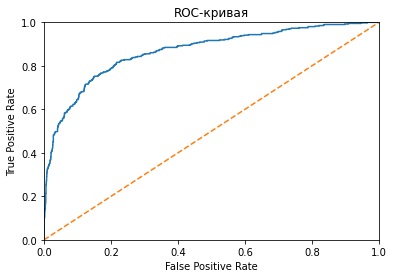

In [22]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid )

plt.figure()

#построим график
plt.plot(fpr, tpr)

#ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

#установим границы осей от 0 до 1 
plt.ylim([0, 1])
plt.xlim([0, 1])

#подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#добавим к графику заголовок "ROC-кривая"
plt.title('ROC-кривая')

plt.show()

Наилучшую эффективность показала модель RandomForestClassifier с гиперпараметрами n_estimators = 20 и max_depth=10. Показала значение метрики f1 = 0.6036585365853658 и ROC-AUC = 0.8669273142674153.

## Борьба с дисбалансом

В алгоритмах присутствует аргумент `class_weight`, но мы его не будем его использовать, т.к. он используется если классы между собой слегка не сбалансированы, а у нас, как мы отметили выше, значений одного класса больше значений другого класса в 4 раза. В связи с этим попробуем методы балансировки upsamling и downsampling.

**Метод upsampling**

In [23]:
#создадим функцию, которая разделит обучающую выборку на отрицательные и положительные объекты
#потом объединит их между собой и перемешает
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 11)
(9666,)


**Метод downsampling**

In [24]:
#создадим функцию, которая разделит обучающую выборку на отрицательные и положительные объекты
#потом случайным образом выделит из большого класса долю меньшего и перемешает
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2416, 11)
(2416,)


Проверим теперь баланс классов

In [25]:
#увеличение выборки
print(target_upsampled.value_counts(normalize=True))

#уменьшение выборки
print(target_downsampled.value_counts(normalize=True))

1    0.50569
0    0.49431
Name: exited, dtype: float64
1    0.505795
0    0.494205
Name: exited, dtype: float64


Протестируем **логистическую регрессию** на новых данных

In [26]:
#создадим объект
model_lr_up = LogisticRegression(random_state=12345, solver='liblinear')

#обучим модель на данных отбалансированных методом upsampling
model_lr_up.fit(features_upsampled, target_upsampled)

#предсказание
predicted_valid = model_lr_up.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.5246753246753246


In [27]:
model_lr_d = LogisticRegression(random_state=12345, solver='liblinear')

#обучим модель на данных отбалансированных методом downsampling
model_lr_d.fit(features_downsampled, target_downsampled)

#предсказание
predicted_valid = model_lr_d.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5275862068965517


Значение метрики f1 модели, обучавшейся на данных отбалансированных методом downsampling, незначительно выше значения метрики f1 модели, обучавшейся на данных отбалансированных методом upsampling, и конечно в разы выше значения метрики f1 модели обучавшейся на несбалансированных данных.

Посчитаем значение метрики AUC-ROC для указанных выше моделей и увидим, как сильно эти модели отличаются от случайной

In [28]:
#метод upsampling
probabilities_valid = model_lr_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.7937774041777517

In [29]:
#метод downsampling
probabilities_valid = model_lr_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.7926027194797518

А вот тут наоборот: значение метрики AUC-ROC модели, обучавшейся на данных отбалансированных методом upsampling, незначительно выше значения метрики AUC-ROC модели обучавшейся на данных отбалансированных методом downsampling 

Протестируем **дерево решений** на отбалансированных данных

In [30]:
#создадим объект
model_dtc_up = DecisionTreeClassifier(random_state=12345)

#обучим модель на данных отбалансированных методом upsampling
model_dtc_up.fit(features_upsampled, target_upsampled)

#получим предсказание
predicted_valid_dtc = model_dtc_up.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid_dtc))

F1: 0.5251533742331288


In [31]:
#создадим объект
model_dtc_d = DecisionTreeClassifier(random_state=12345)

#обучим модель на данных отбалансированных методом downsampling
model_dtc_d.fit(features_downsampled, target_downsampled)

#получим предсказание
predicted_valid_dtc = model_dtc_d.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid_dtc))

F1: 0.49161073825503354


Значение метрики f1 модели, обучавшейся на данных отбалансированных методом upsampling, выше значения f1 модели обучавшейся на данных отбалансированных методом downsampling

Поищем лучшую глубину для моделей обученных на данных отбалансированных методом upsampling и downsampling

In [32]:
#счетчик на лучшую глубину
best_max_depth = 0

#счетчик на лучшую f1
best_max_depth_f1 = 0

#переберем каждое значение глубины от 1 до 20
for i in range(1,20):
    model_dtc_up = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model_dtc_up.fit(features_upsampled, target_upsampled)
    predicted_valid_dtc_up = model_dtc_up.predict(features_valid)
    f1_dtc_up = f1_score(target_valid, predicted_valid_dtc_up)
    if f1_dtc_up > best_max_depth_f1:
        best_max_depth = i
        best_max_depth_f1 = f1_dtc_up

print('Лучшая f1', best_max_depth_f1, 'при глубине', best_max_depth)

Лучшая f1 0.575925925925926 при глубине 6


In [33]:
#посчитаем метрику AUC-ROC (upsampling)
model_dtc_up = DecisionTreeClassifier(random_state=12345, max_depth=6)

model_dtc_up.fit(features_upsampled, target_upsampled)

probabilities_valid = model_dtc_up.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.8233423551581437

In [34]:
#счетчик на лучшую глубину
best_max_depth = 0

#счетчик на лучшую f1
best_max_depth_f1 = 0

#переберем каждое значение глубины от 1 до 20
for i in range(1,20):
    model_dtc_d = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model_dtc_d.fit(features_downsampled, target_downsampled)
    predicted_valid_dtc_d = model_dtc_d.predict(features_valid)
    f1_dtc_d = f1_score(target_valid, predicted_valid_dtc_d)
    if f1_dtc_d > best_max_depth_f1:
        best_max_depth = i
        best_max_depth_f1 = f1_dtc_d

print('Лучшая f1', best_max_depth_f1, 'при глубине', best_max_depth)

Лучшая f1 0.5944919278252612 при глубине 6


In [35]:
#посчитаем метрику AUC-ROC (downsampling)
model_dtc_d = DecisionTreeClassifier(random_state=12345, max_depth=6)

model_dtc_d.fit(features_downsampled, target_downsampled)

probabilities_valid = model_dtc_d.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.8477767206128681

Получилось, что хоть модель дерева решений, обученная на данных отбалансированных методом upsampling, дает значение метрики f1 выше, чем эта же модель, обученная на данных отбалансированных методом downsampling, но при поиске лучшей глубины на одной и той же глубине в 6 узлов модель, обученная на данных отбалансированных методом downsampling, дает все таки лучшую метрику f1 = 0.594 и лучшую метрику AUC-ROC = 0.847

Протестируем **случайный лес** на отбалансированных данных

In [36]:
#создадим объект
model_rfc_up = RandomForestClassifier(random_state=12345)

#обучим модель на данных отбалансированных методом upsampling
model_rfc_up.fit(features_upsampled, target_upsampled)

#получим предсказание
predicted_valid_rfc = model_rfc_up.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid_rfc))

F1: 0.6358839050131926


In [37]:
#создадим объект
model_rfc_d = RandomForestClassifier(random_state=12345)

#обучим модель на данных отбалансированных методом downsampling
model_rfc_d.fit(features_downsampled, target_downsampled)

#получим предсказание
predicted_valid_rfc = model_rfc_d.predict(features_valid)

#считаем метрику f1
print('F1:', f1_score(target_valid, predicted_valid_rfc))

F1: 0.5984848484848485


Пока что ситуация повторяется как и с деревом решений: f1-метрика модели, обучавшейся на данных отбалансированных методом upsampling, лучше f1-метрики модели, обучавшейся на данных отбалансированных методом downsampling

Поищем лучшее количество деревьев и лучшую глубину для моделей обученных на данных отбалансированных методом upsampling и downsampling

In [38]:
#метод upsampling
best_max_est_f1 = 0
best_max_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_rfc_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc_up.fit(features_upsampled, target_upsampled)
        predicted_valid_rfc_up = model_rfc_up.predict(features_valid) 
        f1_rfc_up = f1_score(target_valid, predicted_valid_rfc_up)
        if f1_rfc_up > best_max_est_f1:
            best_max_est_f1 = f1_rfc_up
            best_max_est = est
            best_depth = depth
print('Лучшая f1', best_max_est_f1, 'при количестве', best_max_est, 'и', best_depth)

Лучшая f1 0.6511134676564156 при количестве 30 и 10


In [39]:
#посчитаем метрику AUC-ROC (upsampling)
model_rfc_up = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=10)

model_rfc_up.fit(features_upsampled, target_upsampled)

probabilities_valid = model_rfc_up.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.8664554389595034

In [40]:
best_max_est_f1 = 0
best_max_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_rfc_d = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rfc_d.fit(features_downsampled, target_downsampled) 
        predicted_valid_rfc_d = model_rfc_d.predict(features_valid) 
        f1_rfc_d = f1_score(target_valid, predicted_valid_rfc_d)
        if f1_rfc_d > best_max_est_f1:
            best_max_est_f1 = f1_rfc_d
            best_max_est = est
            best_depth = depth
print('Лучшая f1', best_max_est_f1, 'при количестве', best_max_est, 'и', best_depth)

Лучшая f1 0.6375121477162294 при количестве 30 и 7


In [41]:
#посчитаем метрику AUC-ROC (downsampling)
model_rfc_d = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=7)

model_rfc_d.fit(features_downsampled, target_downsampled)

probabilities_valid = model_rfc_d.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid )

0.8654593432850527

Получилось, что модель алгоритма "случайный лес" обученная на данных отбалансированных методом upsampling с количеством деревьев = 30 и глубиной = 10 узлов дала лучшее значение метрики f1 = 0.6511134676564156 и лучшее значение метрики AUC-ROC = 0.8664554389595034

## Тестирование модели

Когда определились с моделью и гиперпараметрами, то можно объединить обучающую и валидационную выборку и обучить модель на объединенной выборке, а потом и протестировать ее на тестовых данных

In [42]:
#объединяем выборки train и valid
united_features = pd.concat([features_upsampled, features_valid], ignore_index=True, sort=False)
united_target  = pd.concat([target_upsampled, target_valid], ignore_index=True, sort=False)

In [43]:
#создаем выбранную модель с выбранными гиперпараметрами
model_rfc_up = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=10)

#обучаем модель на объединенных данных
model_rfc_up.fit(united_features, united_target)

#получаем предсказание на тестовых данных
test_predictions_rfc = model_rfc_up.predict(features_test)

#считаем значение метрики f1
print('F1:', f1_score(target_test, test_predictions_rfc))

F1: 0.6130177514792898


Считаем значение метрики ROC-AUC

In [44]:
probabilities = model_rfc_up.predict_proba(features_test)

probabilities_one = probabilities[:, 1]

roc_auc_score(target_test, probabilities_one)

0.8512919699360376

Построим ROC-кривую для обученной модели и изобразим её на графике

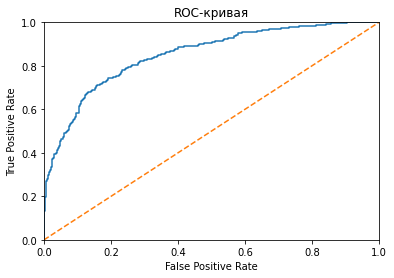

In [45]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)

plt.figure()

#построим график
plt.plot(fpr, tpr)

#ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

#установим границы осей от 0 до 1 
plt.ylim([0, 1])
plt.xlim([0, 1])

#подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#добавим к графику заголовок "ROC-кривая"
plt.title('ROC-кривая')

plt.show()

**Вывод:** значение метрики f1 выбранной модели = 0.6130177514792898, что выше заявленного в задаче порога - 0.59. Значение метрики ROC-AUC = 0.8512919699360376

## Итоговый вывод

Была проведена предобработка предоставленных данных: приведены к одному регистру наименования столбцов. Также названия столбцов были переименованы. Были заменены пропуски в столбце `tenure`. Пропуски были заменены медианным значением этого же столбца. В определенных столбцах был изменен тип данных с `float` на `int`. Категориальные признаки данных были переведены в численные методом прямого кодирования (OHE) и масштабированы. По целевому признаку данные оказались не сбалансированы. 

На несбалансированных данных были исследованы три модели: DecisionTreeClassifier, RandomForestClassifier и LinearRegression. Наилучшую эффективность показала модель RandomForestClassifier с гиперпараметрами n_estimators = 20 и max_depth=10. Показала значение метрики f1 = 0.6036585365853658 и ROC-AUC = 0.8669273142674153.



Далее данные были отбалансированы двумя методами: upsampling и downsampling. На отбалансированных двумя разными методами данных были также исследованы три модели: DecisionTreeClassifier, RandomForestClassifier и LinearRegression. Наилучшую эффективность показала модель RandomForestClassifier с гиперпараметрами n_estimators = 30 и max_depth=10. RandomForestClassifier была проверена на тестовой выборке и показала значение метрики f1 = 0.6130177514792898, что выше заявленного в задаче порога - 0.59 и значение метрики ROC-AUC = 0.8512919699360376